<a href="https://colab.research.google.com/github/gauravkinhikar97/Hotel-booking-analysis-individual-notebook/blob/main/Hotel_Booking_Analysis_Individual_Project_by_Gaurav_Kinhikar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Data_df = pd.read_csv('/content/drive/MyDrive/Capstone Project/hotel booking analysis/Hotel Bookings.csv')

In [ ]:
Data_df = Data_df.copy()

In [ ]:
print(Data_df.shape)

(119390, 32)


In [ ]:
Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Find out missing values

In [ ]:
Data_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Data having four columns with null values then this colums has to fill with 0

In [ ]:
Data_df[['agent','company']] = Data_df[['agent','company']].fillna(0.0)

In [ ]:
## For the missing values in the country column, replace it with mode (value that appears most often)
Data_df['country'].fillna(Data_df.country.mode().to_string(), inplace=True)


## for missing children value, replace it with rounded mean value
Data_df['children'].fillna(round(Data_df.children.mean()), inplace=True)

In [ ]:
## Drop Rows where there is no adult, baby and child
df = Data_df.drop(Data_df[(Data_df.adults+Data_df.babies+Data_df.children)==0].index)

# Let's see some Analysis On given Data

# 1. Booking percentage ratio between Resort Hotel and City Hotel

We have two types of hotel's Resort hotel and City hotel let's see via pie chart which type of hotel prefers a lot by guest's

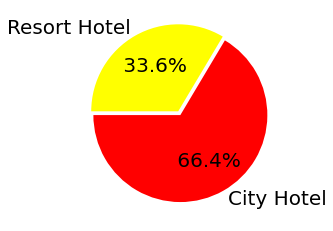

In [ ]:
labels = Data_df['hotel'].value_counts().index.tolist()
size = Data_df['hotel'].value_counts().tolist()
explode = (0,0.05)
colors = ['red', 'yellow']

plt.pie(size, explode=explode, labels=labels, colors=colors, autopct='%5.1f%%',startangle =180, textprops={'fontsize':20})
plt.show()

Most Guests Prefer City Hotel over Resort Hotel

# 2. Cancelation and not cancelation ratio

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


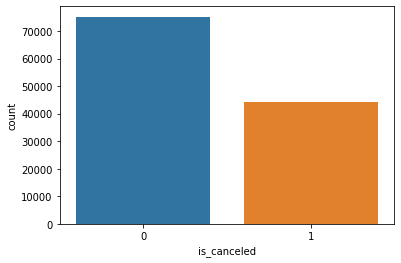

In [ ]:
sns.countplot('is_canceled',data = Data_df)

0 is not canceled and 1 is canceled

Bookings which are not canceled are more in numbers than which are canceled

# 3. Which hotel have high cancelations of bookings ?

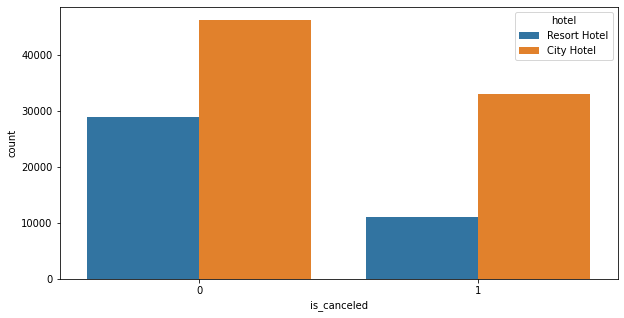

In [ ]:
sns.countplot(x=Data_df['is_canceled'],hue=Data_df['hotel'])

City hotel have high cancelations of bookings than resort hotel

# 4. Now we will see which year and month guests booking is high and also which Hotel is engaged most with bookings

In [ ]:
Data_df.arrival_date_year.value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

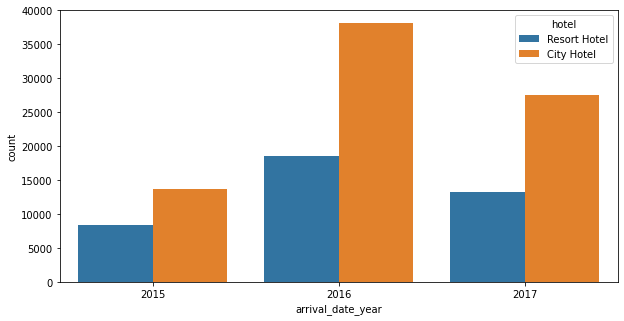

In [ ]:
sns.countplot(x=Data_df['arrival_date_year'],hue=Data_df['hotel'])

we have seen that in 2016 here is most number of guest and In which guests prefer city hotel over resort hotel

# 5. In which Month's Guests booking is engaged most with hotel

In [ ]:
Data_df.arrival_date_month.value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

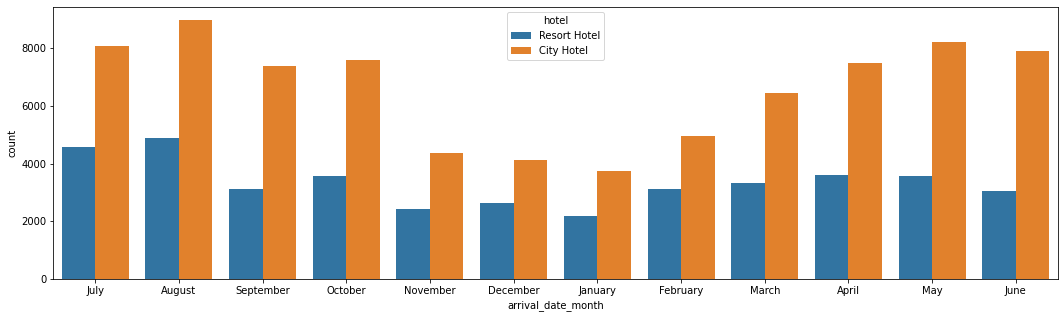

In [ ]:
sns.countplot(x=Data_df['arrival_date_month'],hue=Data_df['hotel'])
plt.rcParams['figure.figsize'] = (18, 5)

August is the most engaged month and also city hotel have the most guest's bookings

# 6. Special requests by types of customer

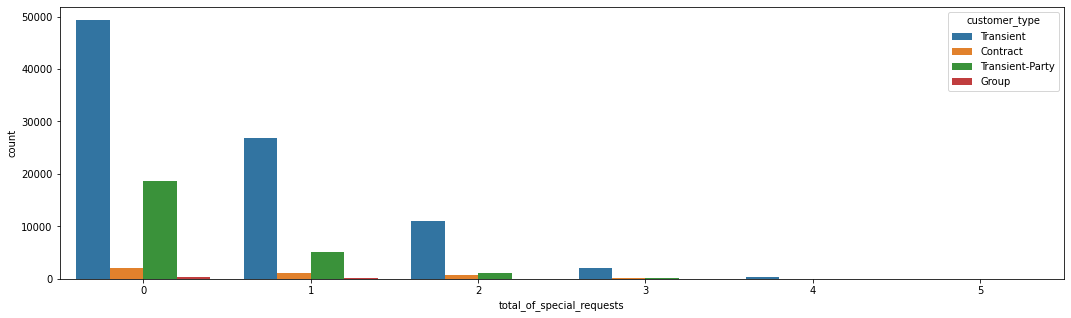

In [ ]:
sns.countplot(x=Data_df['total_of_special_requests'],hue=Data_df['customer_type'])
plt.rcParams['figure.figsize'] = (18, 5)

Here is graph showing 1,2,3 are most of the customer done the special request are from transient types 

# lets see which hotel gets special request

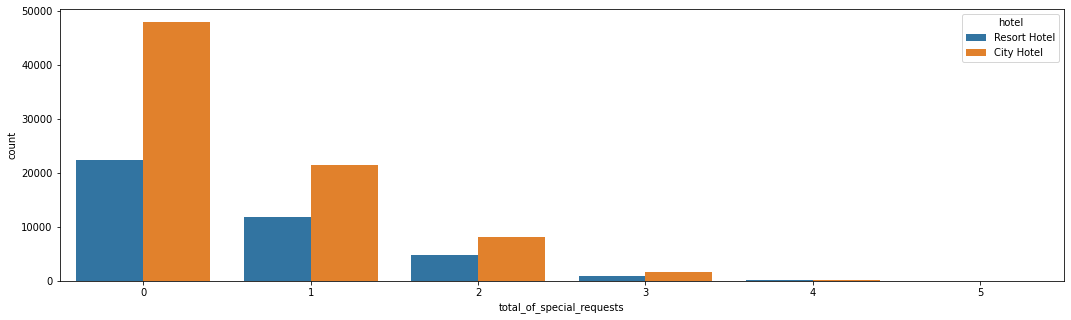

In [ ]:
sns.countplot(x=Data_df['total_of_special_requests'],hue=Data_df['hotel'])
plt.rcParams['figure.figsize'] = (18, 5)

so, these analysis shows us that 1,2,3 graphs shows for special request for city hotel are in higher proportion than resort hotel

# 7. what is the proportion of Reservation Status

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


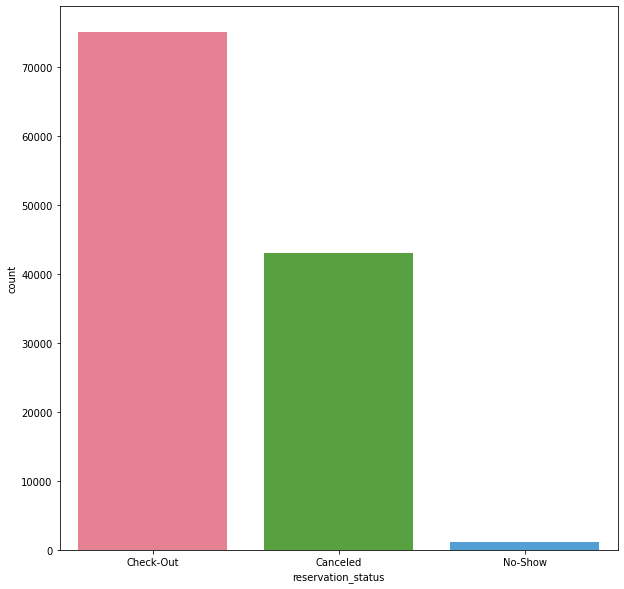

<Figure size 360x576 with 0 Axes>

In [ ]:
sns.countplot(df['reservation_status'], palette='husl')
plt.figure(figsize=(5,8))
plt.show()


1.Canceled — booking was canceled by the customer
2.Check-Out — customer has checked in but already departed
3.No-Show — customer did not check-in


# Lets see what is the proportion of reservations between hotels

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


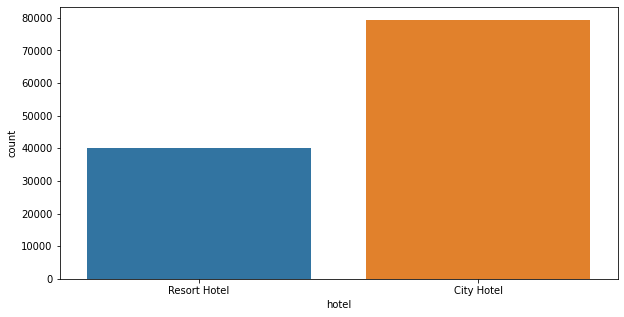

In [ ]:
sns.countplot('hotel',data = Data_df)
plt.rcParams['figure.figsize'] = (10,10)

city hotel is higher in numbers for reservations 


# 6. Which types of repeated guests have visited the most ?

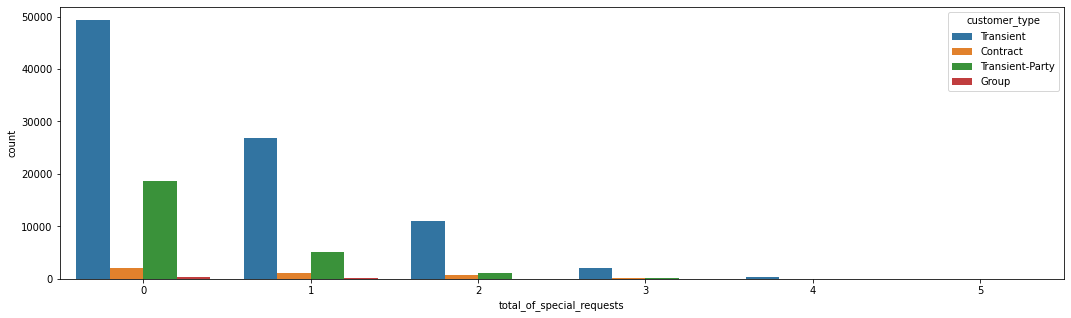

In [ ]:
sns.countplot(x=Data_df['total_of_special_requests'],hue=Data_df['customer_type'])
plt.rcParams['figure.figsize'] = (18, 5)

Here is graphs 1,2,3 is showing that transient types of guests have done the special request 

# 7. How many repeated guest's have visited (single , double, more than two)? 

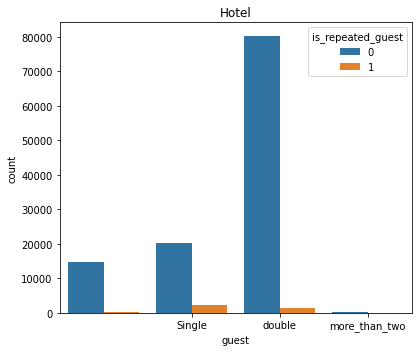

In [ ]:
#one person
single=(Data_df.adults==1) & (Data_df.children==0) &(Data_df.babies==0)

#couple
double=(Data_df.adults==2) & (Data_df.children==0) &(Data_df.babies==0)

#family
more_than_two=(Data_df.adults>=2) & (Data_df.children>0) &(Data_df.babies>0)

Data_df["guest"]=single.astype(int)*1 + double.astype(int) * 2 + more_than_two.astype(int) * 3
plt.figure(figsize=(11,5))
index=2
for hotel_kind in ['Hotel']:
  plt.subplot(1,2,index)
  index+=3
  sns.countplot(x=Data_df["guest"],
                hue=Data_df['is_repeated_guest'],
                data=Data_df[Data_df.hotel == hotel_kind])
  
plt.xticks([1, 2, 3], ['Single', 'double', 'more_than_two'])
plt.title(hotel_kind)
plt.tight_layout()
plt.show()

There are only single and double types of guest's have visited repeatedly